# Detecting faces using Haar/LBP cascades
How often have you been impressed with your phone or digital camera when faces on the photo have been detected? There's no doubt you want to implement something similar on your own, or incorporate a face detection feature in your algorithms. 

The object detector is an algorithm that is able to find objects in the image, it computes the parameters of the bounding box inside of which there is an object, and also determines to which category (or class) the object belongs. In this recipe, we're working with detectors for only one category, upright frontal face.

Detectors can be based on various technologies, and usually involve machine learning. This recipe tells you how to use cascade-based detectors. One of the main advantages of this type of detector is its working time, it handles images even faster than real time on modern hardware, and that's why it's still popular.

OpenCV contains a lot of pre-trained detectors for different purposes, you can find bounding boxes for **cats**, **eyes**, **license plates**, **bodies**, and of course, **faces**. All of these detectors are available in the main OpenCV repository, in the `/data` subdirectory (https://github.com/opencv/opencv/tree/master/data). All detectors are represented with `.xml` files, which contain all of the parameters of the detectors.

To create the detector, you need to use the `cv2.CascadeClassifier` class constructor. You can pass path to `XML` file with cascade parameters to the constructor — it load detected from the file then. Also, you can load the parameters later by using the `load` function, as shown in the preceding code.

To use the loaded classifier, you need to call the `detectMultiScale` function of its instance. It accepts these arguments: the 8-bit grayscale image where you can find the objects, the scale factor, the neighbors number, flags, and the minimal and maximal object sizes. The scale factor determines how we scale an image to find objects at different sizes; bigger values lead to faster computation, but also to a higher probability of rejecting faces of intermediate sizes. The neighbors number calls to increase the robustness of the algorithm, this number determines how many overlapped detections there should be for the current object to count it as a true object. Flags are used for previously created classifiers, and are necessary for backward compatibility. Minimal and maximal sizes are obviously determined boundaries for the object sizes we want to detect. `detectMultiScale` returns a list of bounding boxes for objects in the input image; each box is in an (`x, y, width, height`) format.

If you're interested in training your own cascade classifier, OpenCV has a good tutorial on this topic. The tutorial can be found at https://docs.opencv.org/3.3.0/dc/d88/tutorial_traincascade.html.

In [1]:
# Import all of the necessary modules
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    #%pylab inline
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis)
        plt.title(name)
        if cmap =='gray':
            plt.imshow(img,cmap='gray' )
        else:
            plt.imshow(img )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S04\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s04\env

d:\html_doc\program\opencv\packt\s04\env\lib\site-packages
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


------  img----------------------    Shape(512, 512, 3) img: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]
------  gray---------------------    Shape(512, 512) gray: uint8
[ 162 162 162 161 162 157 163 ]


<Figure size 720x360 with 0 Axes>

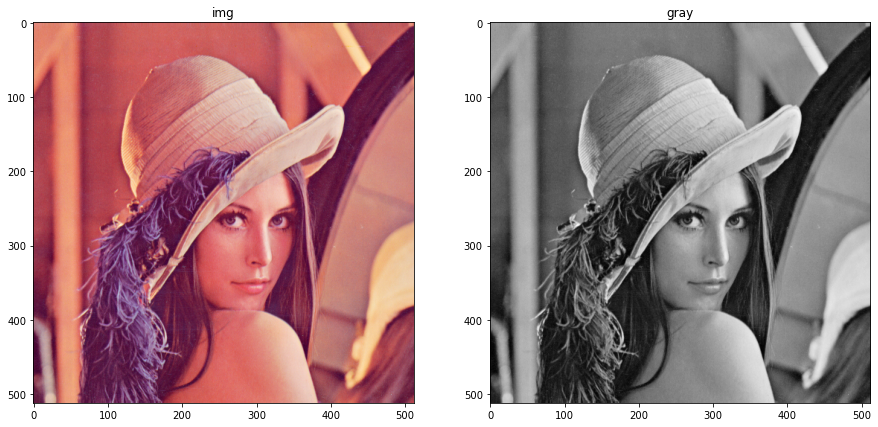

In [2]:
img = cv2.imread('data/Lena.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


###########################################################
print_image('img','img',img,0,1,0,7)
print_image('gray','gray',gray,0,1,0,7)
plt.figure(figsize=(10,5))
plt_view_image(plt,[["img",img[:,:,[2,1,0]]],["gray",gray]  ],
              figsize=(15,8), axis='on', cmap='gray'
              )

# Display digits image
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
#cv2.CascadeClassifier([filename]) -> <CascadeClassifier object>
# Load the pre-trained Haar cascade from OpenCV, and call our detect function
haar_face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_default.xml')
print(haar_face_cascade)

# Загружаем каскады для глаз.
haar_eye_cascade = cv2.CascadeClassifier('data/haarcascade_eye.xml')
print(haar_eye_cascade)

<CascadeClassifier 0000019873C9A670>
<CascadeClassifier 0000019873C6A170>


[[224 210 156 156]]


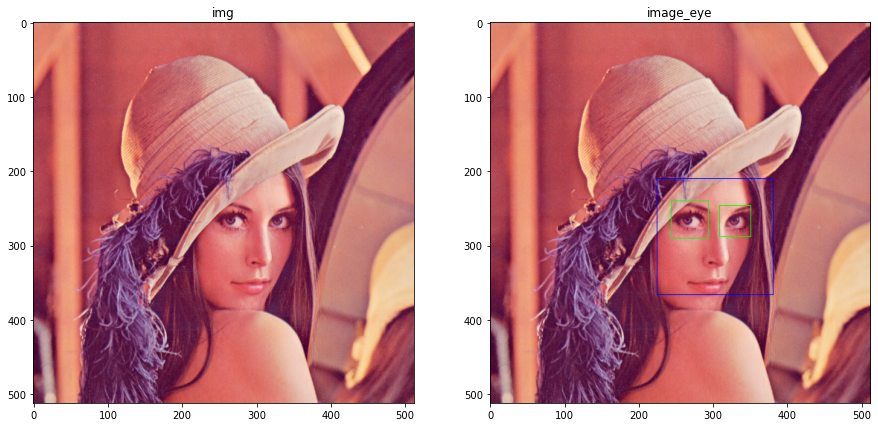

In [4]:
#cv2.CascadeClassifier.detectMultiScale(image[, scaleFactor[, minNeighbors[, flags[, minSize[, maxSize]]]]]) -> objects
#  cascade – Haar classifier cascade (OpenCV 1.x API only). It can be loaded from XML or YAML file using Load(). 
#            When the cascade is not needed anymore, release it using cvReleaseHaarClassifierCascade(&cascade).
#  image - Matrix of the type CV_8U containing an image where objects are detected.
#  objects - Vector of rectangles where each rectangle contains the detected object, the rectangles may be 
#            partially outside the original image.
#  numDetections - Vector of detection numbers for the corresponding objects. An object's number of detections is the 
#                  number of neighboring positively classified rectangles that were joined together to form the object.
#  double scaleFactor = 1.1 - scaleFactor - Parameter specifying how much the image size is reduced at each image scale.
#  int minNeighbors = 3, - Parameter specifying how many neighbors each candidate rectangle should have to retain it.
#  int flags = 0, - Parameter with the same meaning for an old cascade as in the function cvHaarDetectObjects. 
#                   It is not used for a new cascade.
#  Size minSize = Size(), - Minimum possible object size. Objects smaller than that are ignored.
#  Size maxSize = Size(), - maxSize - Maximum possible object size. Objects larger than that are ignored. 
#                           If maxSize == minSize model is evaluated on single scale.
# bool outputRejectLevels = false 


faces = haar_face_cascade.detectMultiScale(
        img                  #
        ,scaleFactor=1.2     # Находим лица на фото
        ,minNeighbors=4      #
        ,minSize=(20, 20)    #
    )
print(faces)

image_eye = np.copy(img)
for (x,y,w,h) in faces:
    image_eye = cv2.rectangle(image_eye,(x,y),(x+w,y+h),(255,0,0),1)
    #roi_gray = gray[y:y+h, x:x+w]
    roi_color = image_eye[y:y+h, x:x+w]
    eyes = haar_eye_cascade.detectMultiScale(roi_color)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),1)


        
############################################        
plt_view_image(plt,[["img",img[:,:,[2,1,0]]],
                    ["image_eye",image_eye[:,:,[2,1,0]]]  ],
               figsize=(15,8), axis='on', cmap='gray'
              )

cv2.imshow('img, img_grabCut', np.hstack([img, image_eye]))
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# Define the function that opens a video file, invokes a detector to find 
# all of the faces in the image, and displays the results
def detect_faces(path, detector, win_title, image_frames):

    cap = cv2.VideoCapture(path)
    print('Created capture:', path)
    print('Frame count:', int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
    print('Frame width:', int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
    print('Frame height:', int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    print('Frame rate:', cap.get(cv2.CAP_PROP_FPS))
    
    count = 0
    while True:
        status_cap, frame = cap.read()
        if not status_cap:
            break
            
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        faces = detector.detectMultiScale(gray, 1.3, 5)

        for x, y, w, h in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 3)
            text_size, _ = cv2.getTextSize('Face', cv2.FONT_HERSHEY_SIMPLEX, 1, 2)
            cv2.rectangle(frame,(x, y-text_size[1]),(x+text_size[0], y),(255,255,255),cv2.FILLED)
            cv2.putText(frame, 'Face', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
        cv2.imshow(win_title, frame)

        count += 1
        if count ==1:
                image_frames.append(["{0}({1})".format(win_title[:11],count),frame[:,:,[2,1,0]]])
        if count % 20 == 0:
                image_frames.append(["{0}({1})".format(win_title[:11],count),frame[:,:,[2,1,0]]])
                
        if cv2.waitKey(1) == 27: 
            break

    cap.release()
    cv2.destroyAllWindows()  

Created capture: ../data/faces.mp4
Frame count: 721
Frame width: 1280
Frame height: 720
Frame rate: 23.976023976023978
len(image_frames) == 37


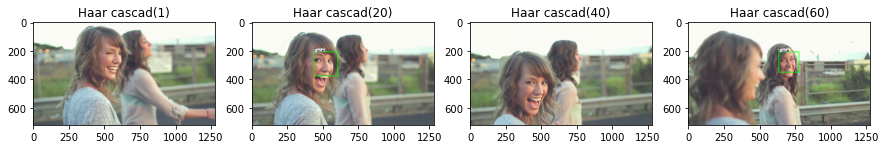

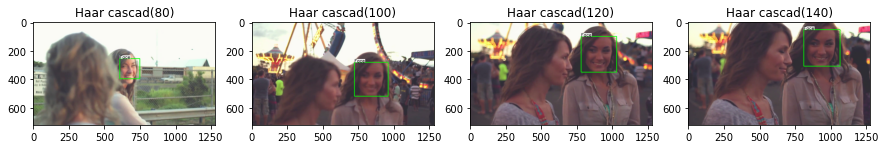

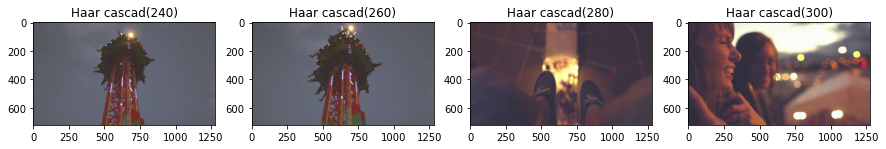

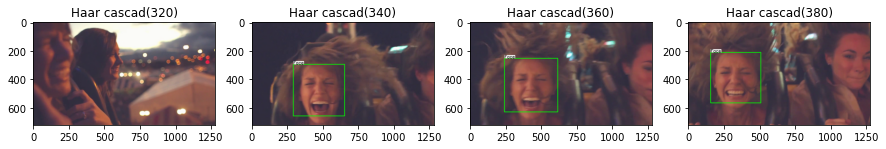

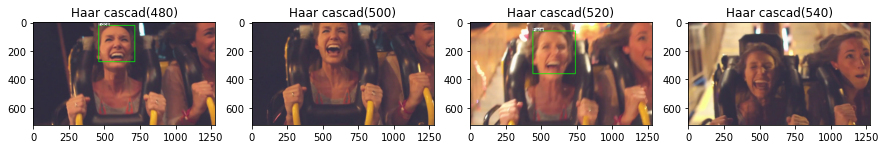

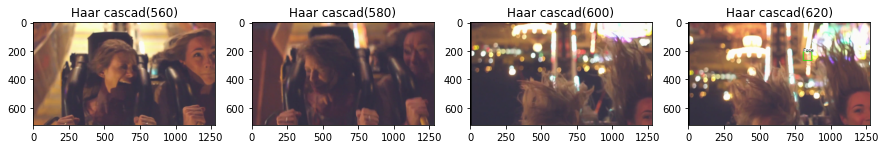

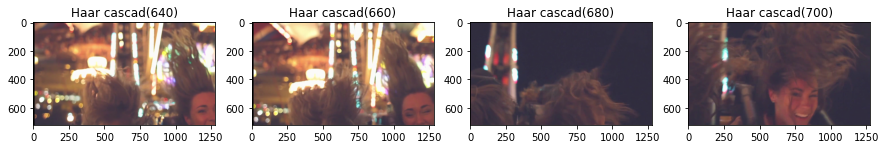

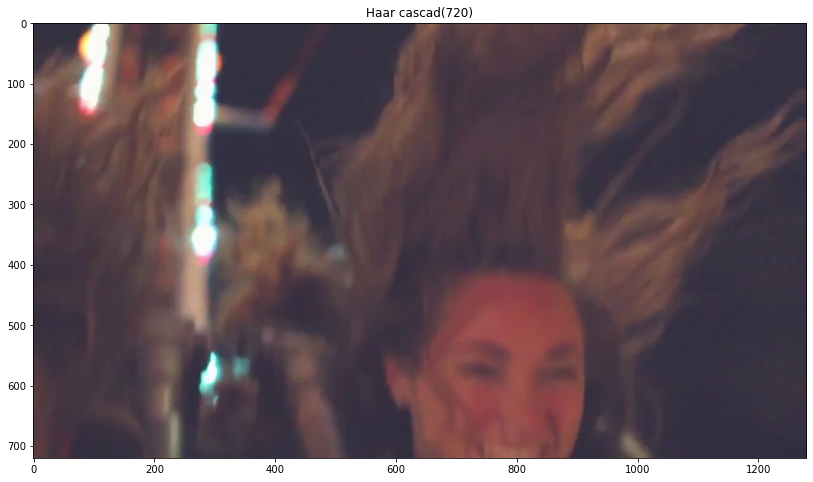

In [6]:
image_frames =[]

# invole our function and pass the image path and cascade
# Display the results
detect_faces('../data/faces.mp4', haar_face_cascade, 'Haar cascade face detector',image_frames)

print("len(image_frames) ==", len(image_frames))
k =4
for i in range(0,len(image_frames),k):
    plt_view_image(plt,image_frames[i:i+k], figsize=(15,8), axis='on', cmap='gray')

Created capture: ../data/faces.mp4
Frame count: 721
Frame width: 1280
Frame height: 720
Frame rate: 23.976023976023978
len(image_frames) == 37
0


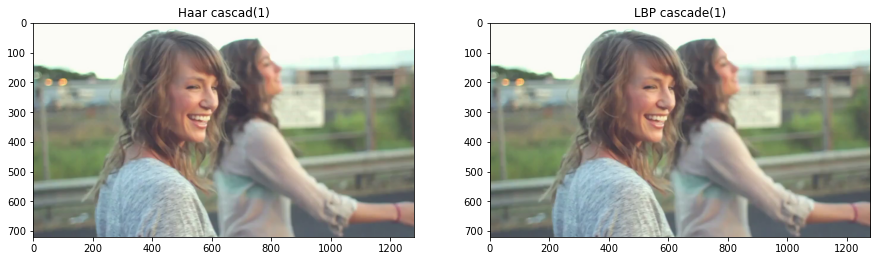

1


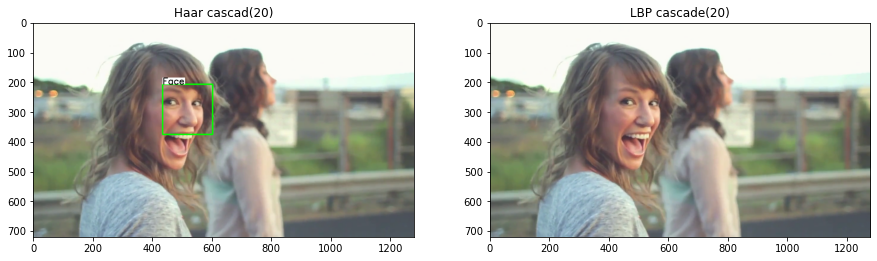

2


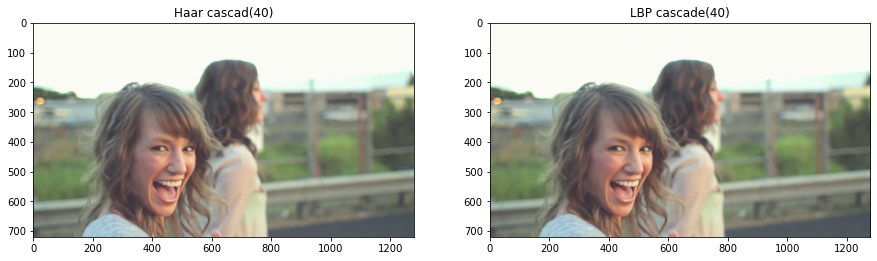

3


4


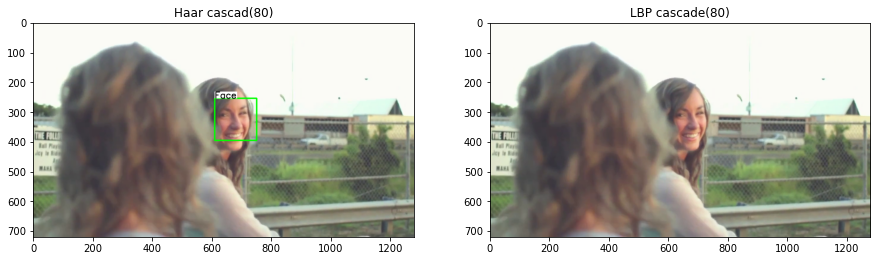

5


6


7


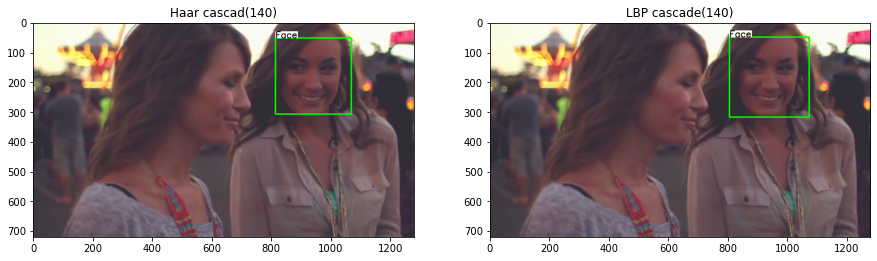

8


9


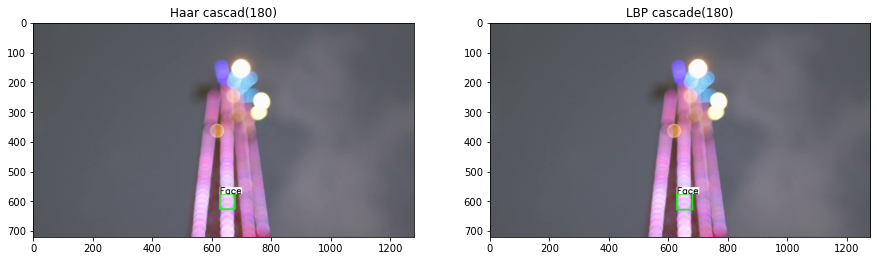

10


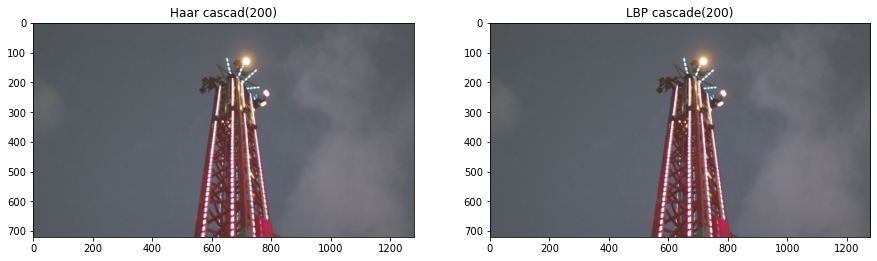

11


12


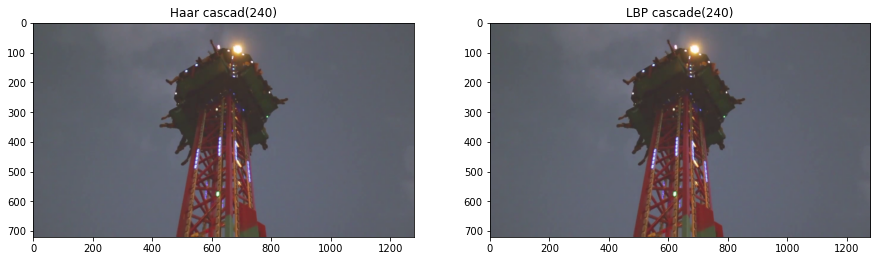

13


14


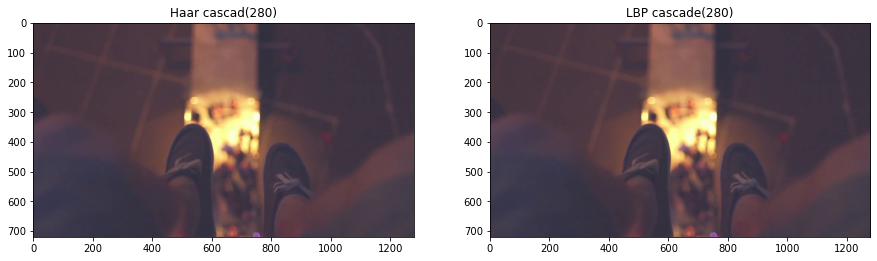

15


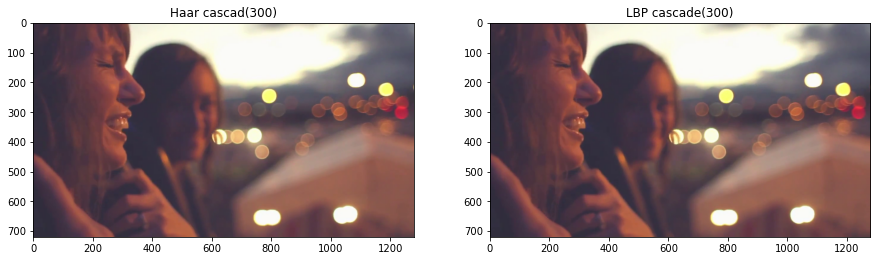

16


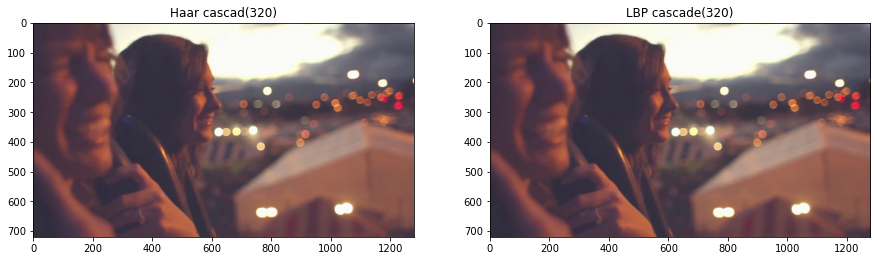

17


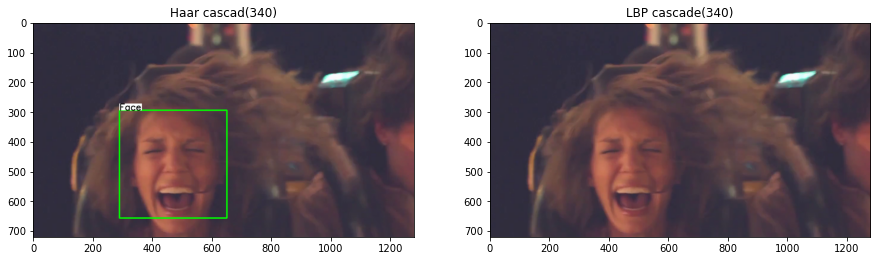

18


19


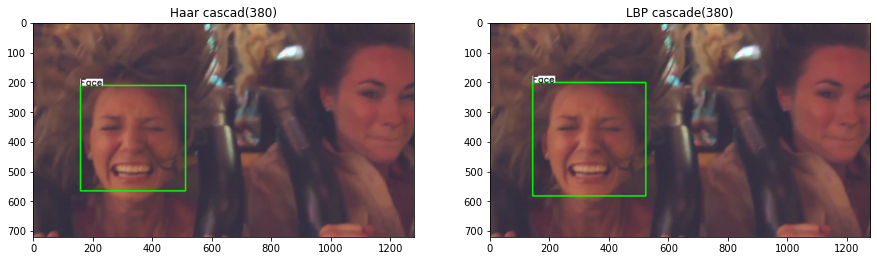

20


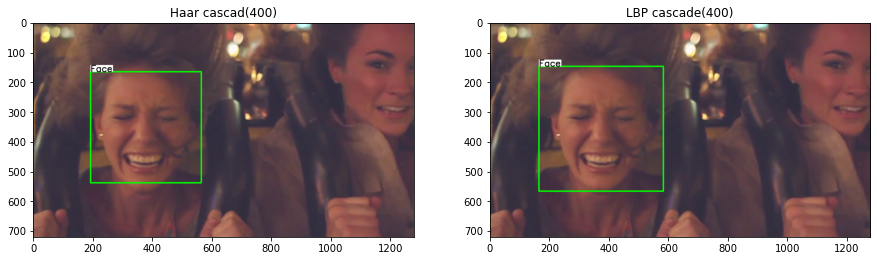

21


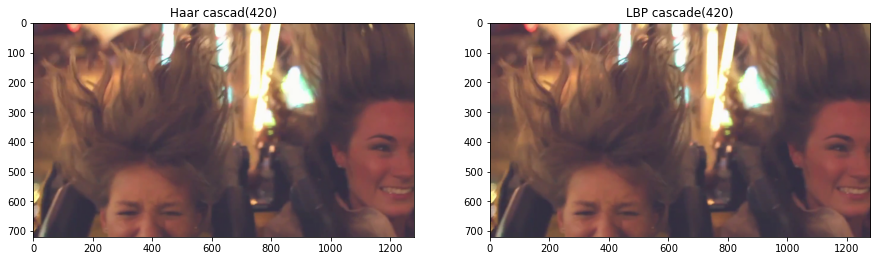

22


23


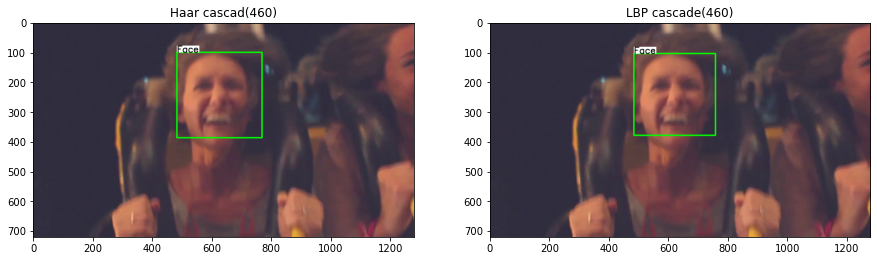

24


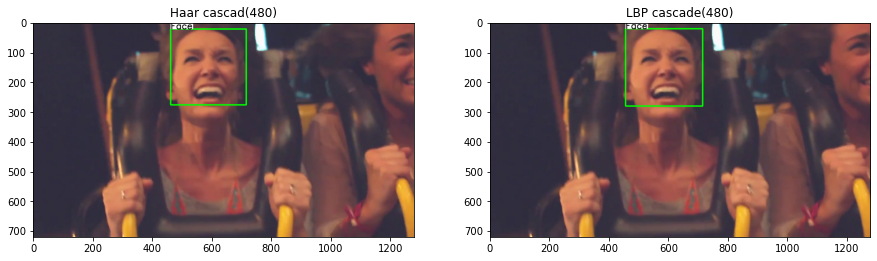

25


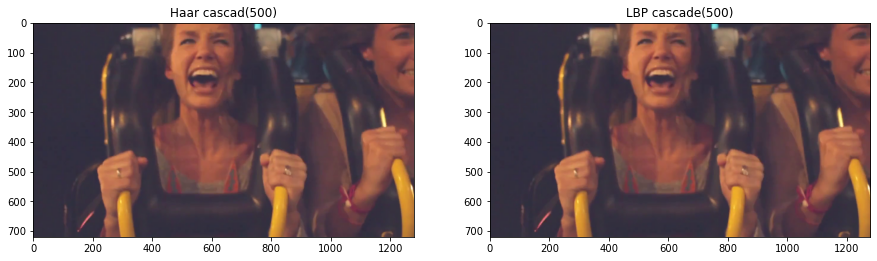

26


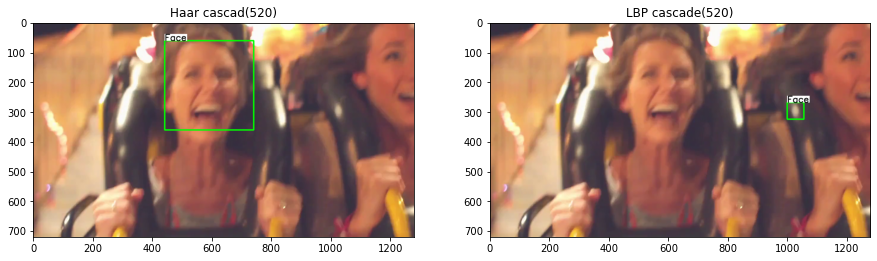

27


28


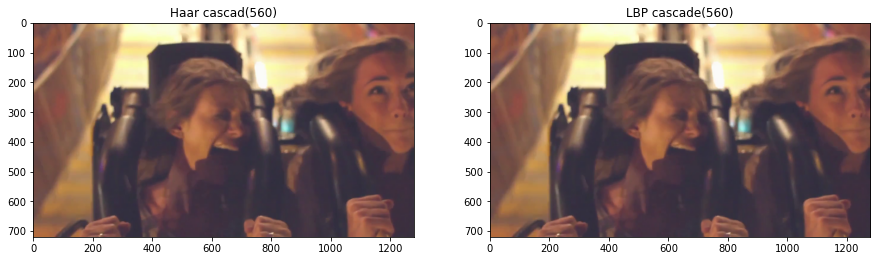

29


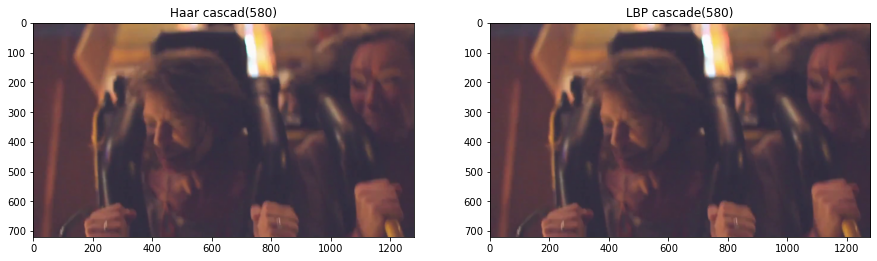

30


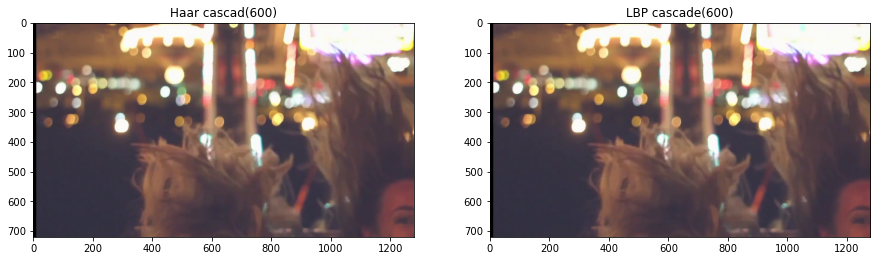

31


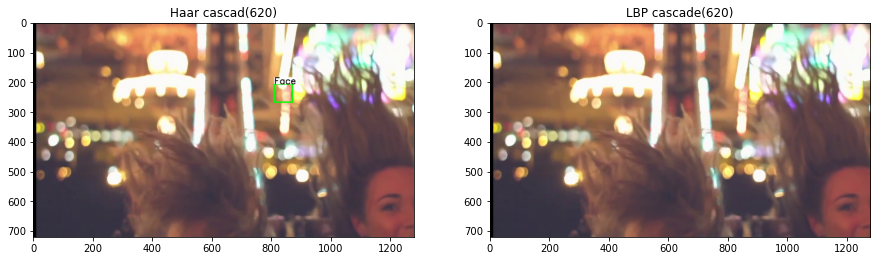

32


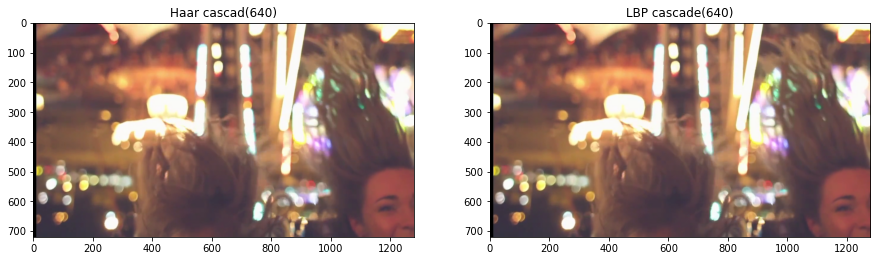

33


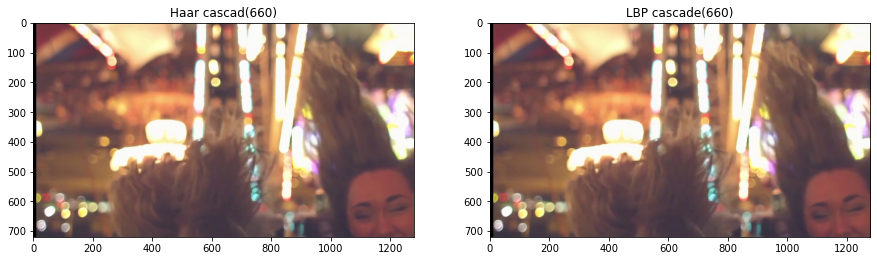

34


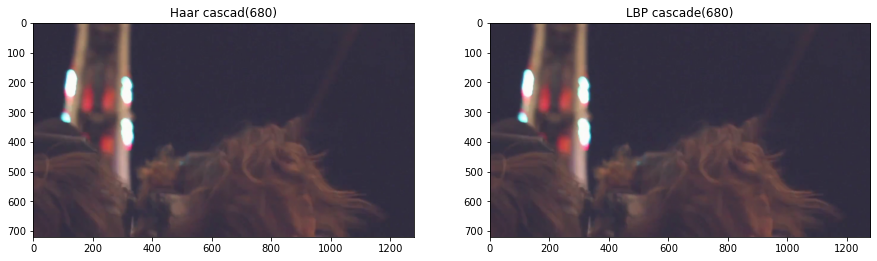

35


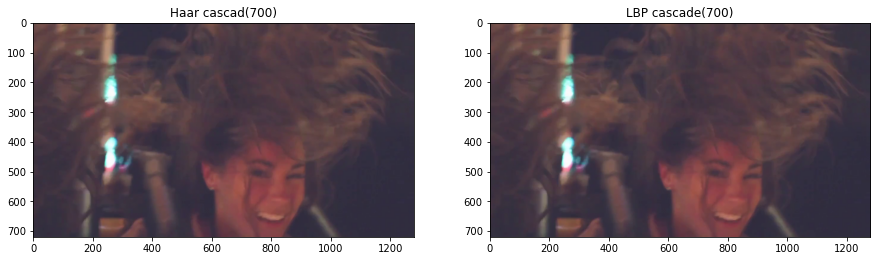

36


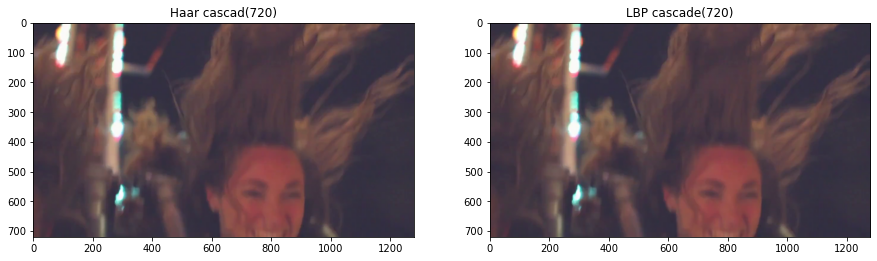

In [7]:
image_frames_lbr =[]


lbp_face_cascade = cv2.CascadeClassifier()
lbp_face_cascade.load('../data/lbpcascade_frontalface.xml')

#detect_faces(0, lbp_face_cascade, 'LBP cascade face detector') # from WebCamera
detect_faces('../data/faces.mp4', lbp_face_cascade, 'LBP cascade face detector',image_frames_lbr)

print("len(image_frames) ==", len(image_frames_lbr))
k =2
for i in range(0,len(image_frames)):
    print(i)
    plt_view_image(plt,[image_frames[i],image_frames_lbr[i]], figsize=(15,8), axis='on', cmap='gray')